# Image Segmentation by Clustering for k value 3

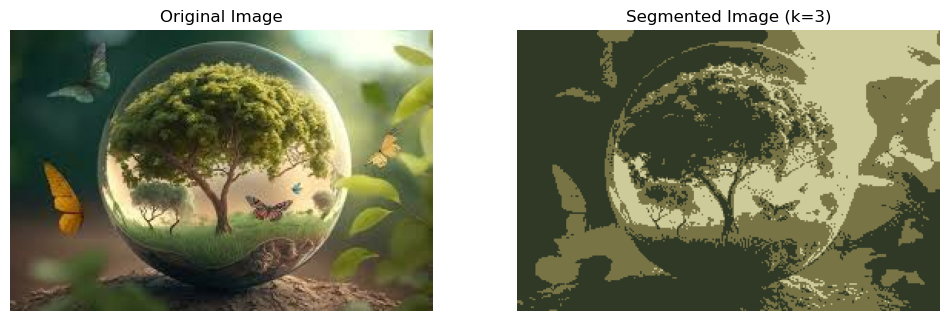

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image_path = r"C:\Users\admin\OneDrive\Pictures\images.jfif"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Reshape the image to a 2D array of pixels (height * width, channels)
pixel_values = image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Define criteria and apply K-means clustering
# Criteria: (type, max_iter, epsilon)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3  # Number of clusters (segments)
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert the centers to uint8 (pixel values)
centers = np.uint8(centers)

# Map the labels to the center values to create the segmented image
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image.shape)

# Display the original and segmented images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title(f"Segmented Image (k={k})")
plt.imshow(segmented_image)
plt.axis("off")

plt.show()


# Image Segmentation by Clustering for k value 2

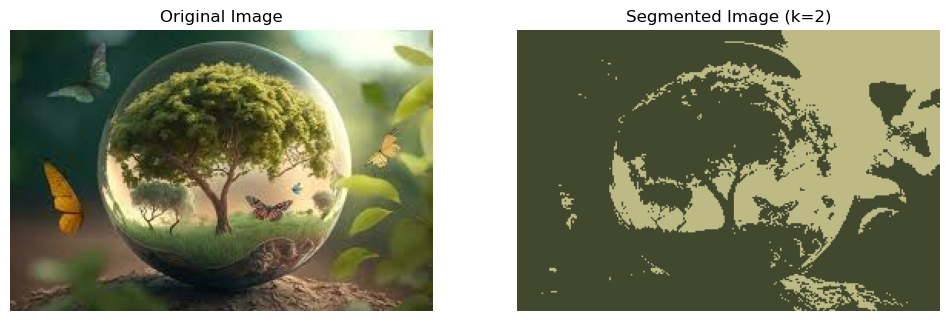

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image_path = r"C:\Users\admin\OneDrive\Pictures\images.jfif"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Reshape the image to a 2D array of pixels (height * width, channels)
pixel_values = image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Define criteria and apply K-means clustering
# Criteria: (type, max_iter, epsilon)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 2  # Set the number of clusters to 2
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert the centers to uint8 (pixel values)
centers = np.uint8(centers)

# Map the labels to the center values to create the segmented image
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image.shape)

# Display the original and segmented images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title(f"Segmented Image (k={k})")
plt.imshow(segmented_image)
plt.axis("off")

plt.show()


# Finding the Optimal K-value through Elbow method

Optimal number of clusters (k) found: 7


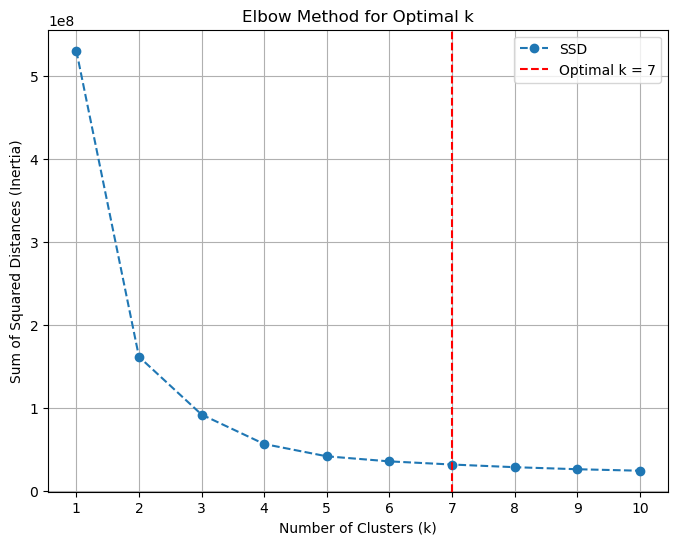

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image_path = r"C:\Users\admin\OneDrive\Pictures\images.jfif"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Reshape the image to a 2D array of pixels (height * width, channels)
pixel_values = image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Define criteria for K-means clustering
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# List to store the sum of squared distances (inertia)
ssd = []

# Test different values of k (from 1 to 10)
k_values = range(1, 11)
for k in k_values:
    _, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    # Compute the sum of squared distances (SSD)
    ssd.append(np.sum((pixel_values - centers[labels.flatten()]) ** 2))

# Find the optimal k using the Elbow Method (maximum curvature)
def find_elbow(ssd, k_values):
    # Compute the second derivative of SSD
    diff = np.diff(ssd, 2)
    optimal_k = k_values[np.argmin(diff) + 1]
    return optimal_k

# Get the optimal k value
optimal_k = find_elbow(ssd, k_values)
print(f"Optimal number of clusters (k) found: {optimal_k}")

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(k_values, ssd, marker='o', linestyle='--', label='SSD')
plt.axvline(x=optimal_k, color='red', linestyle='--', label=f'Optimal k = {optimal_k}')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Sum of Squared Distances (Inertia)")
plt.xticks(k_values)
plt.legend()
plt.grid()
plt.show()


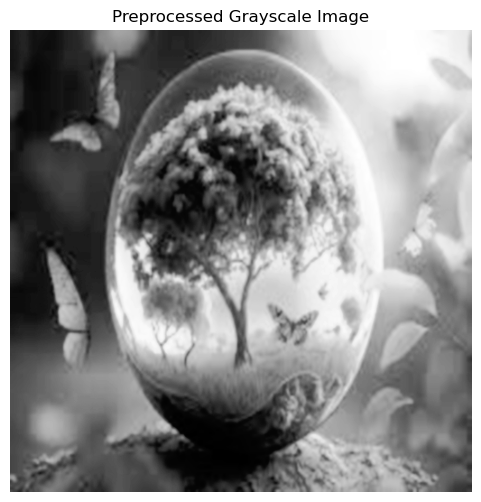

Optimal number of clusters (k) found: 9


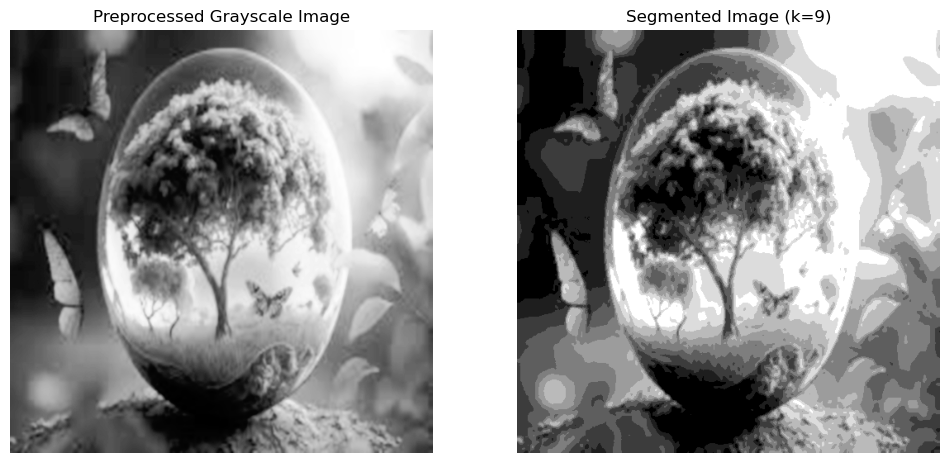

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image_path = r"C:\Users\admin\OneDrive\Pictures\images.jfif"
image = cv2.imread(image_path)

# Resize the image (optional step to reduce computational load)
image = cv2.resize(image, (512, 512))

# Apply Gaussian Blurring to reduce noise
image = cv2.GaussianBlur(image, (5, 5), 0)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Histogram Equalization to improve contrast
gray_image = cv2.equalizeHist(gray_image)

# Display the preprocessed grayscale image
plt.figure(figsize=(6, 6))
plt.title("Preprocessed Grayscale Image")
plt.imshow(gray_image, cmap='gray')
plt.axis("off")
plt.show()

# Reshape the grayscale image to a 2D array of pixels
pixel_values = gray_image.reshape((-1, 1))
pixel_values = np.float32(pixel_values)

# Define criteria for K-means clustering
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# List to store the sum of squared distances (inertia)
ssd = []

# Test different values of k (from 1 to 10)
k_values = range(1, 11)
for k in k_values:
    _, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    # Compute the sum of squared distances (SSD)
    ssd.append(np.sum((pixel_values - centers[labels.flatten()]) ** 2))

# Function to find the optimal k value using the Elbow Method
def find_elbow(ssd, k_values):
    diff = np.diff(ssd, 2)
    optimal_k = k_values[np.argmin(diff) + 1]
    return optimal_k

# Get the optimal k value
optimal_k = find_elbow(ssd, k_values)
print(f"Optimal number of clusters (k) found: {optimal_k}")

# Apply K-means clustering with the optimal k
_, labels, centers = cv2.kmeans(pixel_values, optimal_k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert the centers to uint8 (pixel values)
centers = np.uint8(centers)

# Map the labels to the center values to create the segmented image
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(gray_image.shape)

# Display the original and segmented images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Preprocessed Grayscale Image")
plt.imshow(gray_image, cmap='gray')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title(f"Segmented Image (k={optimal_k})")
plt.imshow(segmented_image, cmap='gray')
plt.axis("off")

plt.show()
